In [27]:
from sklearn.feature_selection import mutual_info_regression
from SALib.sample import saltelli
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
os.chdir("../")
import cpt_optimisation

# Macro

In [8]:
result = {i:[] for i in range(3)}

start_t = time.time()
num_agents = 1225

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    if "DS_" in seed_folder:
        continue

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    
    for f in tqdm(files):
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        data_W = data["W"]
        
        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            regime = 0
        elif prop_richer < 1:
            regime = 1
        else:
            regime = 2
            
        MI = mutual_info_regression(data["A"].reshape(-1,1), 
                                    data["W"][-1].astype(np.float32))[0]
        result[regime].append((MI, seed, param_idx))

0.00 | new_model_runs_paper_14


  0%|          | 0/7168 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
with open("attention_results.pickle", "wb") as f:
    pickle.dump(result, f)

# Meso

In [13]:
result = {i:[] for i in range(3)}
start_t = time.time()
num_agents = 1225

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    if "DS_" in seed_folder:
        continue

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    
    for f in tqdm(files):
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        alpha_val = data["params"][4]
        data_W = data["W"]
        
        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            regime = 0
        elif prop_richer < 1:
            regime = 1
        else:
            regime = 2
        
        # retrieve communities from graph
        with open(f"sda_graphs/{seed}_{alpha_val}.pickle", "rb") as f:
            communities, community_membership, _, _ = pickle.load(f)
            
        for i,c in enumerate(communities):
            idx = np.array(list(c))
            final_comm_w = data_W[-1, idx]
            try:
                MI = mutual_info_regression(data["A"][idx].reshape(-1,1), 
                                            final_comm_w.astype(np.float32))[0]
                result[regime].append((MI, seed, param_idx, i))
            except:
                continue

0.00 | new_model_runs_paper_14


  0%|          | 0/7168 [00:00<?, ?it/s]

1179.65 | new_model_runs_paper_13


  0%|          | 0/7168 [00:00<?, ?it/s]

2307.13 | new_model_runs_paper_12


  0%|          | 0/7168 [00:00<?, ?it/s]

3453.77 | new_model_runs_paper_15


  0%|          | 0/7168 [00:00<?, ?it/s]

4594.06 | .DS_Store
4594.06 | new_model_runs_paper_0


  0%|          | 0/7168 [00:00<?, ?it/s]

5752.17 | new_model_runs_paper_7


  0%|          | 0/7168 [00:00<?, ?it/s]

6924.69 | new_model_runs_paper_9


  0%|          | 0/7168 [00:00<?, ?it/s]

8077.86 | new_model_runs_paper_8


  0%|          | 0/7168 [00:00<?, ?it/s]

9242.26 | new_model_runs_paper_6


  0%|          | 0/7168 [00:00<?, ?it/s]

10390.82 | new_model_runs_paper_1


  0%|          | 0/7168 [00:00<?, ?it/s]

11570.13 | new_model_runs_paper_19


  0%|          | 0/7168 [00:00<?, ?it/s]

12704.49 | new_model_runs_paper_10


  0%|          | 0/7168 [00:00<?, ?it/s]

13858.88 | new_model_runs_paper_17


  0%|          | 0/7168 [00:00<?, ?it/s]

15036.73 | new_model_runs_paper_16


  0%|          | 0/7168 [00:00<?, ?it/s]

16221.17 | new_model_runs_paper_11


  0%|          | 0/7168 [00:00<?, ?it/s]

17371.02 | new_model_runs_paper_18


  0%|          | 0/7168 [00:00<?, ?it/s]

18535.28 | new_model_runs_paper_4


  0%|          | 0/7168 [00:00<?, ?it/s]

19719.07 | new_model_runs_paper_3


  0%|          | 0/7168 [00:00<?, ?it/s]

20895.01 | new_model_runs_paper_2


  0%|          | 0/7168 [00:00<?, ?it/s]

22078.49 | new_model_runs_paper_5


  0%|          | 0/7168 [00:00<?, ?it/s]

In [14]:
with open("attention_results_by_comm.pickle", "wb") as f:
    pickle.dump(result, f)

# Agent Heterogeneity Analysis

In [7]:
seed = 5
param = 5999

d = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{seed}/{seed}_{param+1}_paper.pkl.lzma"))
alpha_val = d["params"][4]
data_W = d["W"]
gamma_pos = np.array([x.gamma_pos for x in d["U"]])
safe_investment = np.array([d["P"][x][-1][-1] for x in d["P"]])

with open(f"sda_graphs/{seed}_{alpha_val}.pickle", "rb") as f:
    _, community_membership, _, _ = pickle.load(f)
    
unique_project_combinations = {}
for agent, agent_comm in community_membership.items():
    combo = tuple(sorted(agent_comm))
    if combo not in unique_project_combinations:
        unique_project_combinations[combo] = [agent]
    else:
        unique_project_combinations[combo].append(agent)

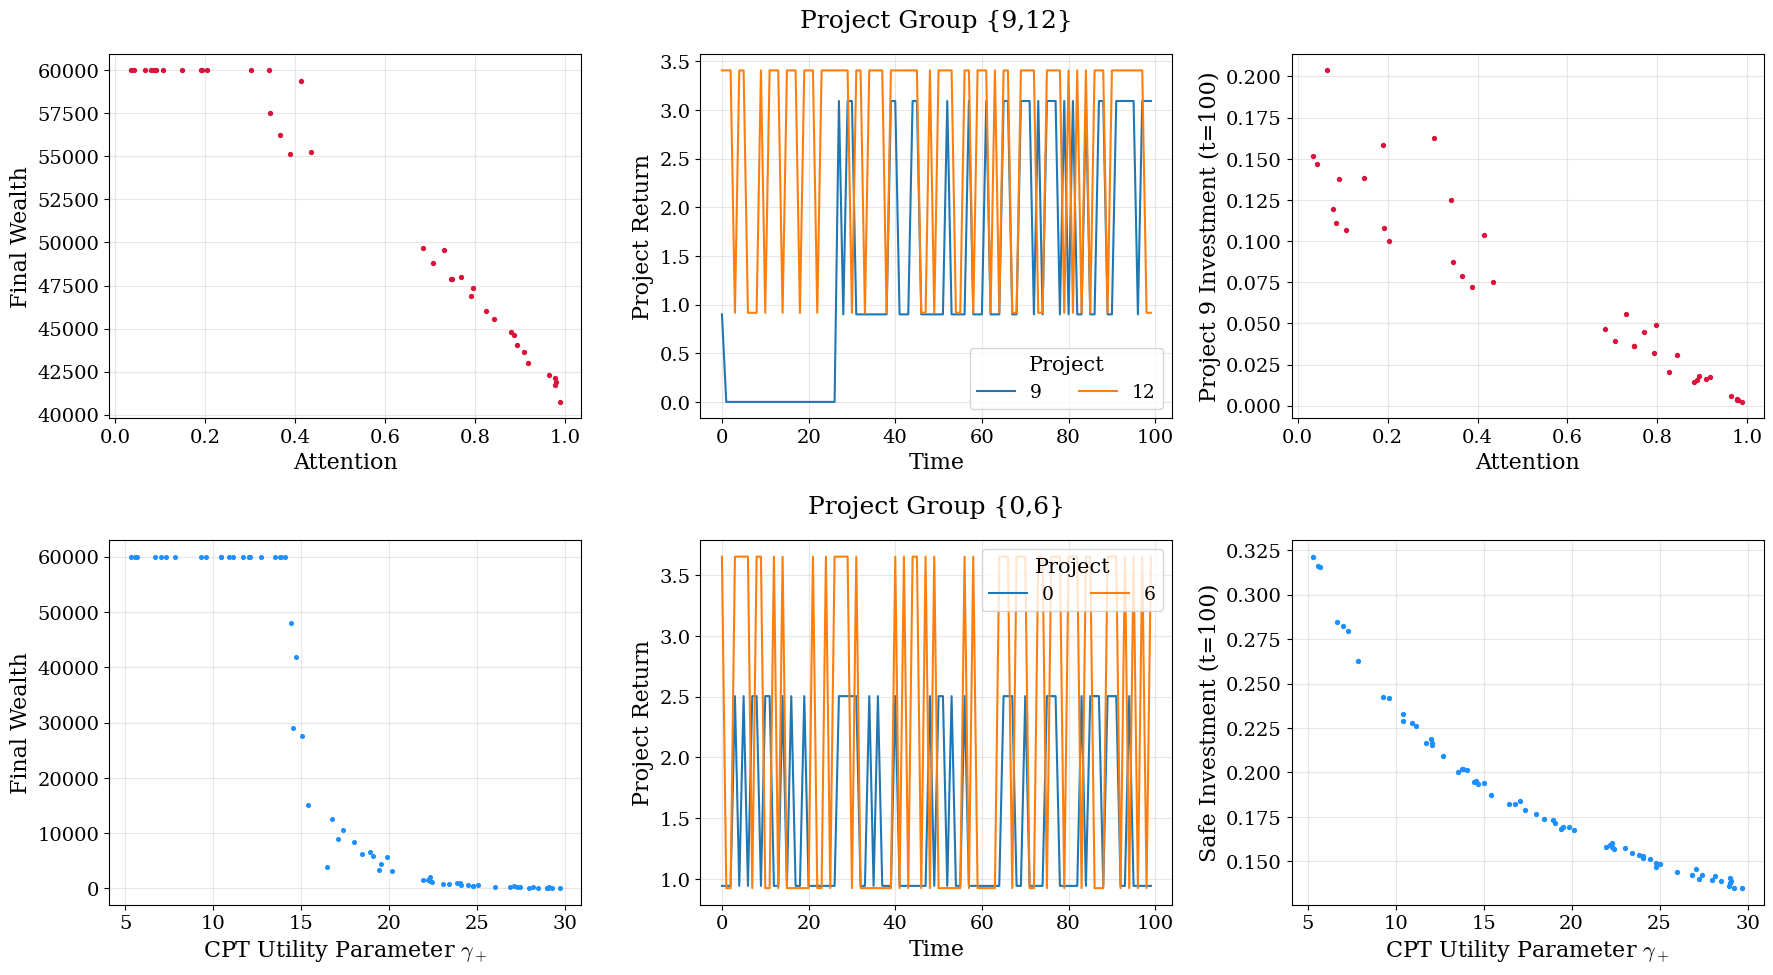

In [146]:
fig, axs = plt.subplots(2, 3, figsize=(18,10))


# attention
idx1 = unique_project_combinations[(9,12,27)]
axs[0][0].scatter(d["A"][idx1], d["W"][-1][idx1], s=8, color="crimson")
axs[0][0].set_xlabel(r"Attention")
axs[0][1].set_title("Project Group {9,12}", y=1.05)
axs[0][0].set_ylabel("Final Wealth")

axs[0][1].plot(d["O"][:,9], label="9")
axs[0][1].plot(d["O"][:,12], label="12")
axs[0][1].legend(title="Project", ncol=2)
axs[0][1].set_xlabel("Time")
axs[0][1].set_ylabel("Project Return")

axs[0][2].scatter(d["A"][idx1], [d["P"][x][-1][0] for x in idx1], s=8, color="crimson")
axs[0][2].set_xlabel("Attention")
axs[0][2].set_ylabel("Project 9 Investment (t=100)")


# gamma pos
idx2 = unique_project_combinations[(0,6,27)]
axs[1][0].scatter(gamma_pos[idx2], d["W"][-1][idx2], s=7, color="dodgerblue")
axs[1][0].set_xlabel(r"CPT Utility Parameter $\gamma_+$")
axs[1][1].set_title("Project Group {0,6}", y=1.05)
axs[1][0].set_ylabel("Final Wealth")

axs[1][1].plot(d["O"][:,0], label="0")
axs[1][1].plot(d["O"][:,6], label="6")
axs[1][1].legend(title="Project", ncol=2, loc="upper right")
axs[1][1].set_xlabel("Time")
axs[1][1].set_ylabel("Project Return")

axs[1][2].scatter(gamma_pos[idx2], safe_investment[idx2], s=8, color="dodgerblue")
axs[1][2].set_xlabel(r"CPT Utility Parameter $\gamma_+$")
axs[1][2].set_ylabel("Safe Investment (t=100)")


fig.tight_layout()
plt.savefig("attention_gamma_pos.pdf", bbox_inches="tight")
plt.show()

In [ ]:
- all agents investing in both 9 and 12
- 12 is more attractive in theory, so agents tend to invest more in 12
- as a result, 9 fails for quite a while at the start of the simulation
- agents with high attention move more and more money towards 12
- however, agents with low attention keep investing towards 9


- when agents are all becoming rich and benefiting from success of project 12, 
project 9 starts succeeding as well since enough money is invested towards it to meet the threshold
- thus, agents with low attention start reaping benefits form 9 and 12
- but agents with too high attention have put too much money into 12  by that point

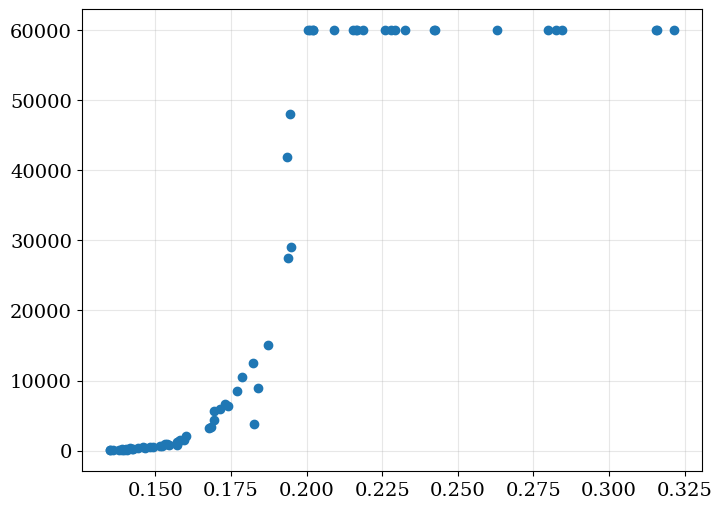

In [147]:
plt.scatter(safe_investment[idx2], d["W"][-1][idx2])

In [124]:
# for key, idx in unique_project_combinations.items():
    
#     if len(idx) < 10:
#         continue

#     fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
#     axs[0].scatter(d["A"][idx], d["W"][-1][idx], s=5)
#     axs[0].set_xlabel("Attention")
#     axs[0].set_ylabel("Final Wealth")

#     axs[1].scatter(de[idx], d["W"][-1][idx], s=5)
#     axs[1].set_xlabel(r"$\gamma$+")

#     fig.tight_layout()
#     plt.suptitle(key, y=1.05)
#     plt.show()

# Results

In [3]:
with open("attention_results.pickle", "rb") as f:
    result = pickle.load(f)

In [4]:
regime = 1

sorted_mi_items = sorted(result[regime], key=lambda x: x[0])

item = sorted_mi_items[-1]

s, p = item[1], item[2] + 1

In [5]:
data = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{s}/{s}_{p}_paper.pkl.lzma"))
data_W = data["W"]

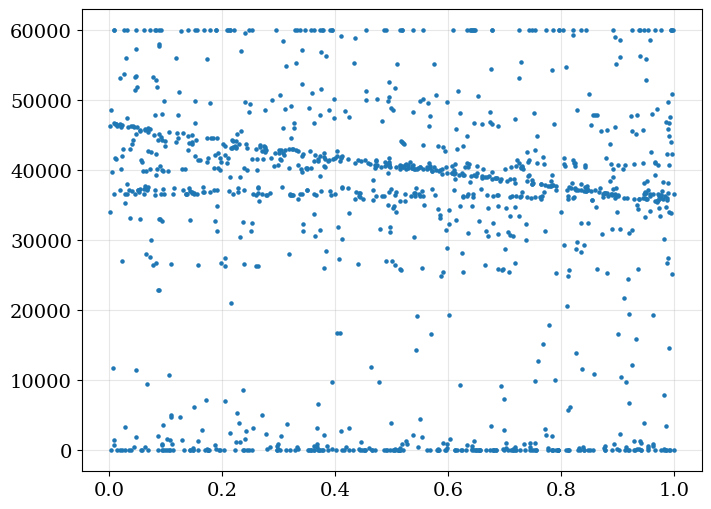

0.280695371087881

In [8]:
plt.scatter(data["A"], data_W[-1,:], s=5)
plt.show()
MI = mutual_info_regression(data["A"].reshape(-1,1), data["W"][-1].astype(np.float32))[0]
MI

In [53]:
alpha_val = data["params"][4]
with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    communities, community_membership, _, _ = pickle.load(f)

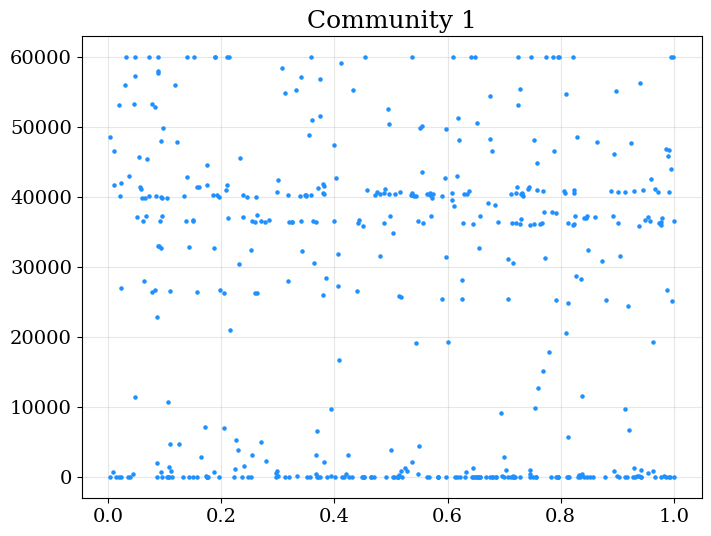

PearsonRResult(statistic=-0.0707684379291642, pvalue=0.12037191984497553)


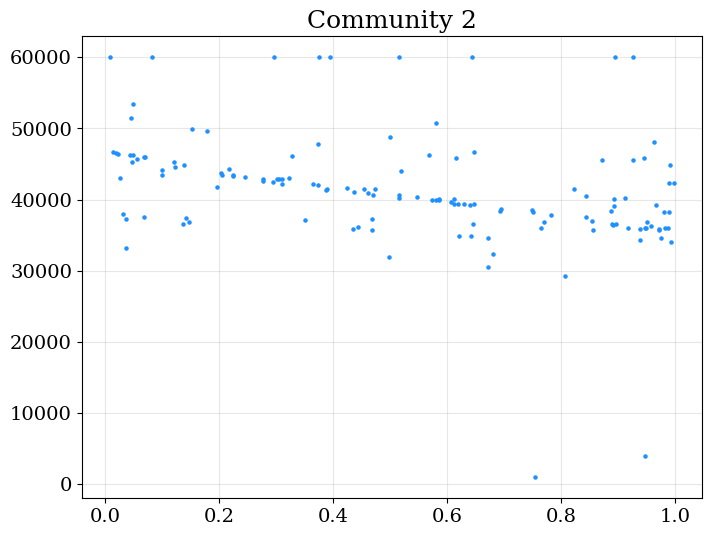

PearsonRResult(statistic=-0.3549069084599504, pvalue=1.8117673570073713e-05)


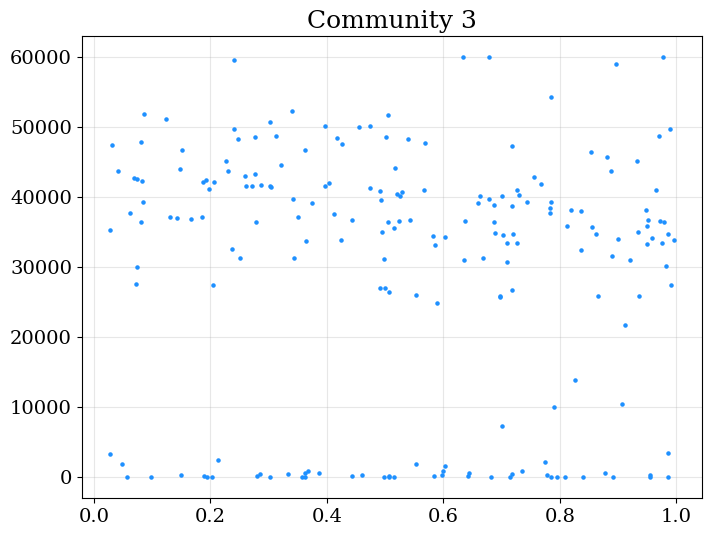

PearsonRResult(statistic=-0.07012345542204637, pvalue=0.3201448723423768)


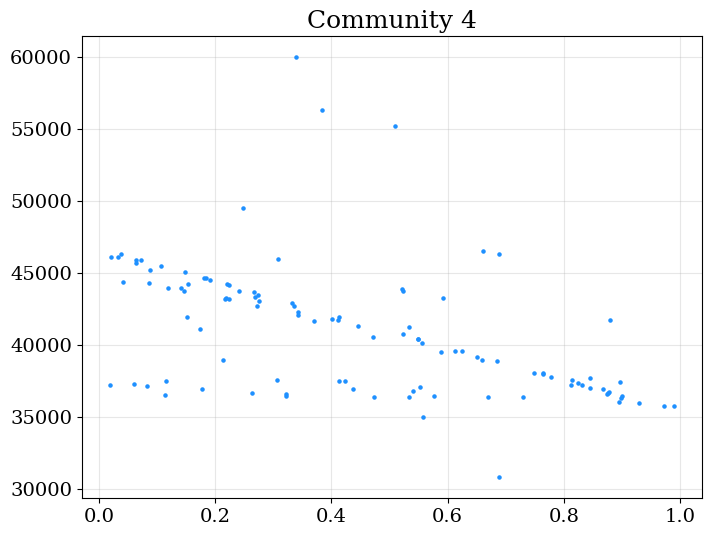

PearsonRResult(statistic=-0.49270067317313476, pvalue=7.011452900489503e-08)


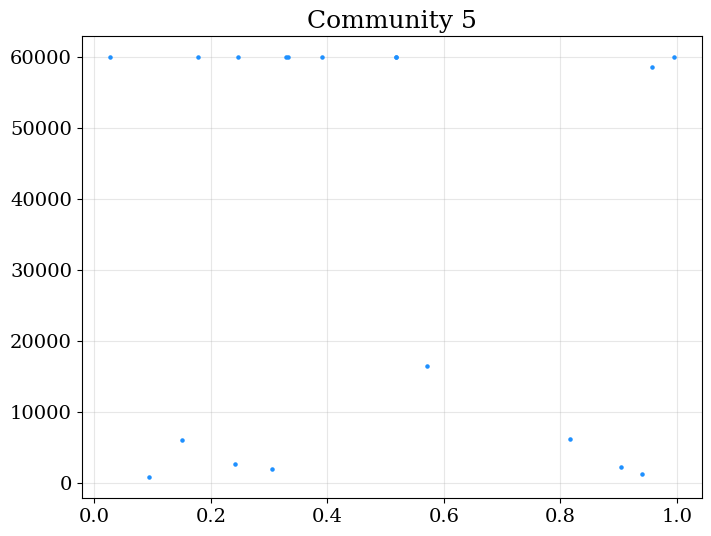

PearsonRResult(statistic=-0.08287493881498717, pvalue=0.7437214839535875)


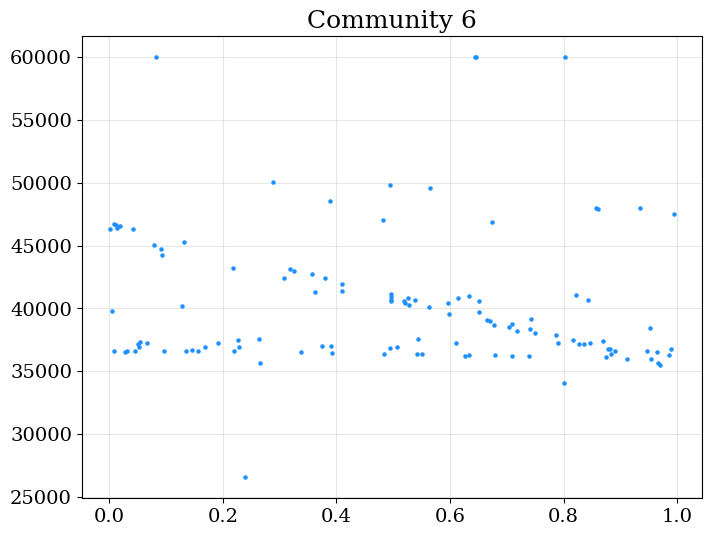

PearsonRResult(statistic=-0.11486028617127872, pvalue=0.2115917464327371)


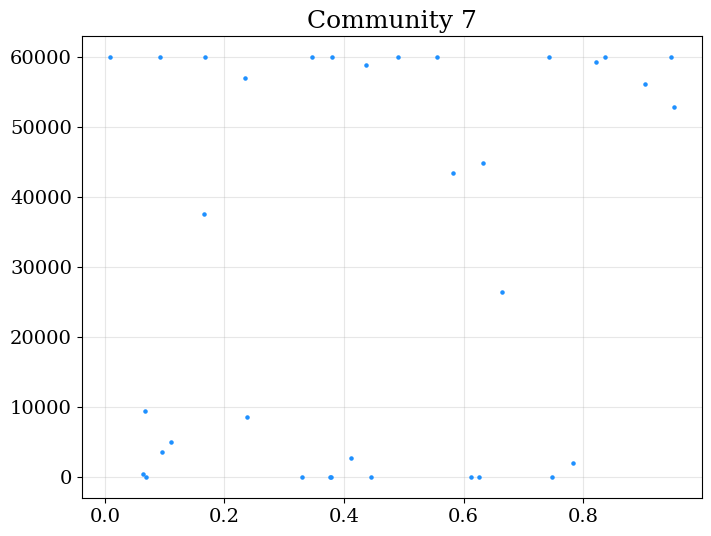

PearsonRResult(statistic=0.25111906479373114, pvalue=0.15198179555004848)


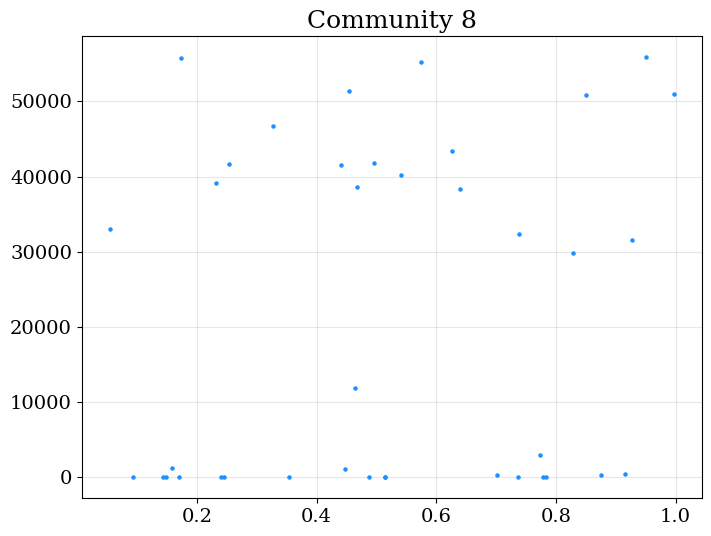

PearsonRResult(statistic=0.15092515489981537, pvalue=0.3590743359648732)


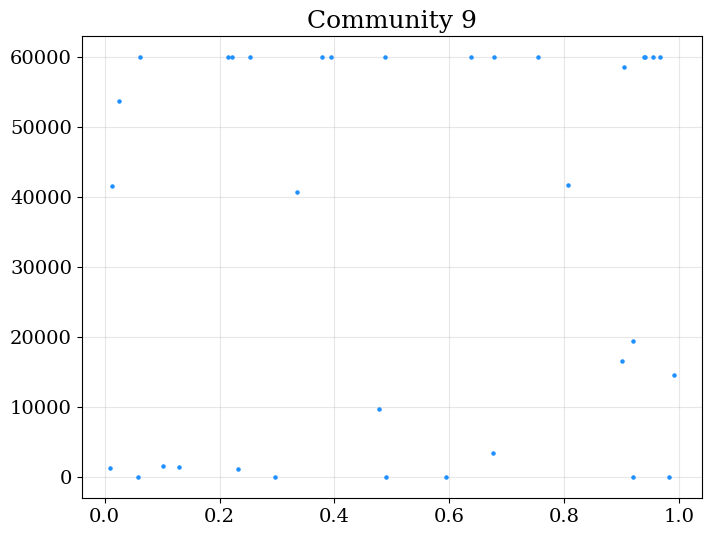

PearsonRResult(statistic=0.10332833081236285, pvalue=0.5608856607021278)


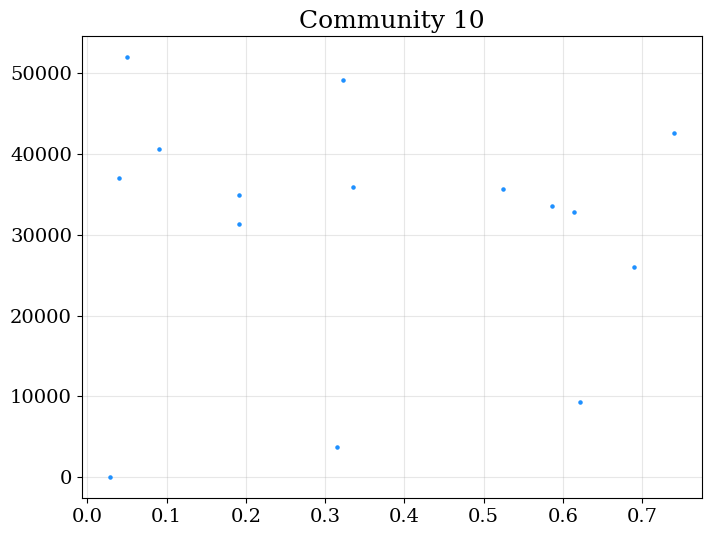

PearsonRResult(statistic=-0.03858142823838186, pvalue=0.891416961402305)


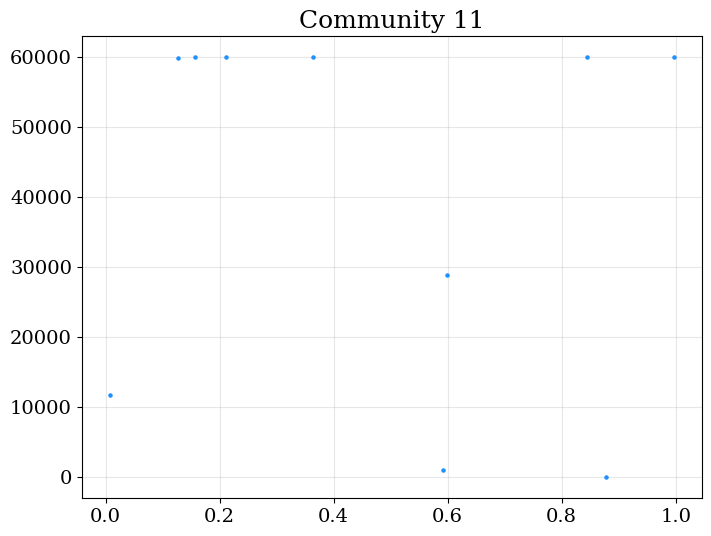

PearsonRResult(statistic=-0.13897224026219968, pvalue=0.7018017736489455)


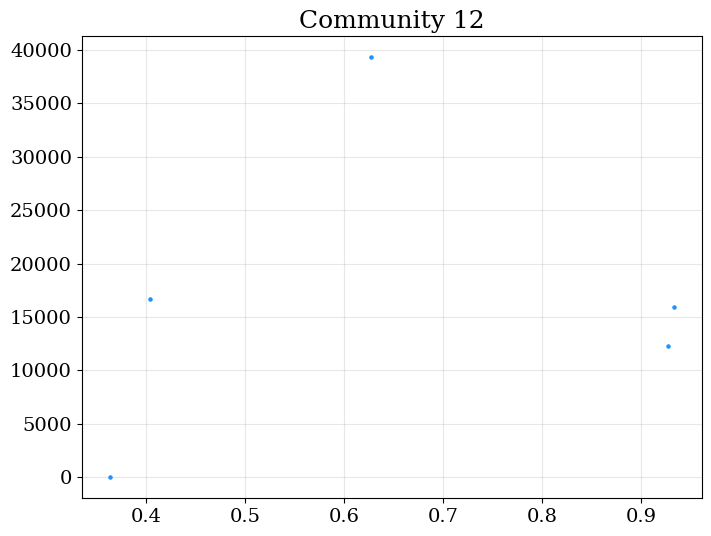

PearsonRResult(statistic=0.18041116145889236, pvalue=0.7715456195072415)


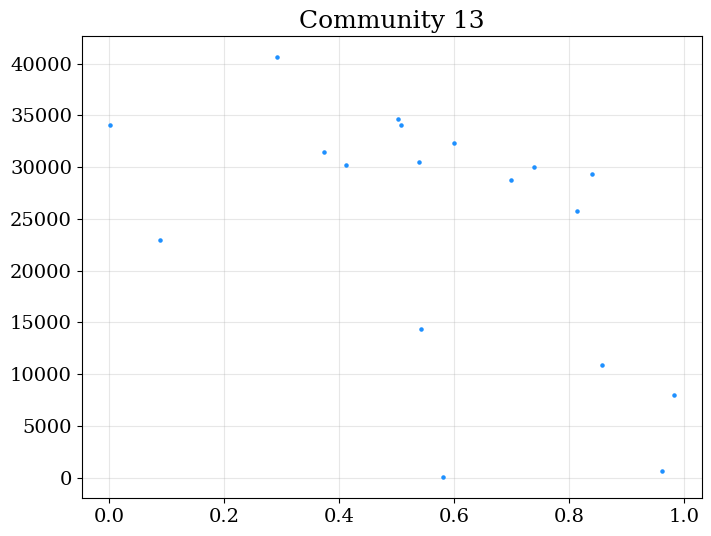

PearsonRResult(statistic=-0.518321109195907, pvalue=0.02754849723160108)


In [54]:
for i,c in enumerate(communities):
    idx = np.array(list(c))
    plt.scatter(data["A"][idx], data["W"][-1,idx], s=5, color="dodgerblue")    
    plt.title(f"Community {i+1}")
    plt.show()
    print(pearsonr(data["A"][idx], data["W"][-1,idx]))

# Results (grouped attention MI by community)

In [3]:
with open("attention_results_by_comm.pickle", "rb") as f:
    data = pickle.load(f)

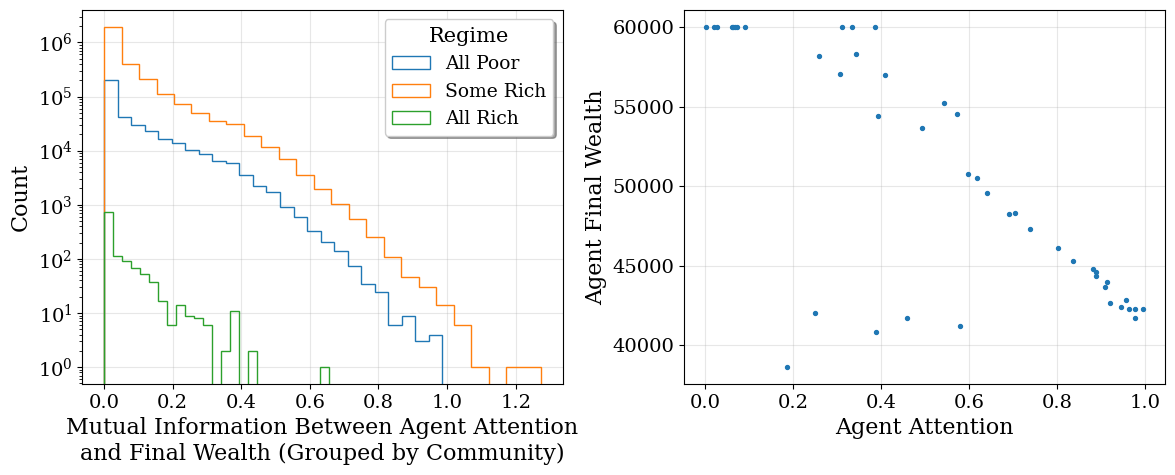

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

label_map = {0:"All Poor", 1:"Some Rich", 2:"All Rich"}
for regime in data:
    mi = [x[0] for x in data[regime]]
    axs[0].hist(mi, histtype="step", bins=25, label=label_map[regime])

axs[0].set_yscale("log")

axs[0].legend(shadow=True, title="Regime")
axs[0].set_xlabel("Mutual Information Between Agent Attention\nand Final Wealth (Grouped by Community)")
axs[0].set_ylabel("Count")

M = max(data[1], key=lambda x:x[0])
s, param_idx = M[1], M[2]
d = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{s}/{s}_{param_idx+1}_paper.pkl.lzma"))

alpha_val = d["params"][4]
data_W = d["W"]
with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    communities, community_membership, _, _ = pickle.load(f)
idx = np.array(list(communities[12]))
axs[1].scatter(d["A"][idx], d["W"][-1][idx], s=8)
axs[1].set_xlabel("Agent Attention")
axs[1].set_ylabel("Agent Final Wealth")

fig.tight_layout()
plt.savefig("attention_figure.pdf", bbox_inches="tight")
plt.show()

In [4]:
M = max(data[1], key=lambda x:x[0])
s, param_idx = M[1], M[2]
print(M)

(1.273799183155732, 5, 5999, 12)


In [5]:
d = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{s}/{s}_{param_idx+1}_paper.pkl.lzma"))

alpha_val = d["params"][4]
data_W = d["W"]
with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    communities, community_membership, _, _ = pickle.load(f)

In [6]:
asdf = []
for i,c in enumerate(communities):
    idx = np.array(list(c))
    final_comm_w = data_W[-1, idx]
    try:
        MI = mutual_info_regression(d["A"][idx].reshape(-1,1), 
                                    final_comm_w.astype(np.float32))[0]
        print(MI, i, len(c))
    except:
        print("error")

0.04238143056935506 0 66
0.08783738091588633 1 111
0.04479212953858447 2 109
0 3 95
0.00937391844003077 4 89
0.009565894150893595 5 51
0 6 72
0 7 40
0.04871141474308782 8 75
0.5323981364943884 9 80
0.06944444444444486 10 6
0.0021940428516757926 11 34
1.273799183155732 12 44
0.06102833504569949 13 23
0.03195572905285182 14 86
0 15 20
0.21680554038072675 16 33
0.02964384889872962 17 69
0 18 17
0.010317460317460503 19 9
0.1090277777777775 20 18
0 21 16
0 22 7
0.17601561203561378 23 29
error
0 25 13
0.016825396825396632 26 10


In [7]:
idx = np.array(list(communities[12]))

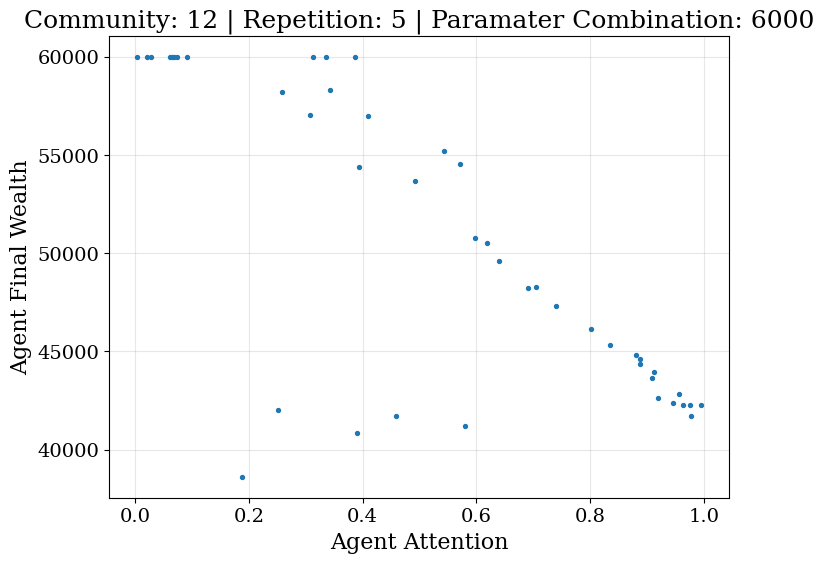

In [10]:
plt.scatter(d["A"][idx], d["W"][-1][idx], s=8)
plt.title("Community: 12 | Repetition: 5 | Paramater Combination: 6000")
plt.xlabel("Agent Attention")
plt.ylabel("Agent Final Wealth")
plt.show()

In [60]:
util_params = np.array(d["U"])[idx]
util_params = np.row_stack(
    [(x.delta_pos, x.delta_neg, x.gamma_pos, x.gamma_neg) for x in util_params]
)

X = np.column_stack([util_params, d["A"][idx].reshape(44,1)])


y = d["W"][-1][idx]

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X, y)


lin = LinearRegression().fit(X, y)

In [96]:
from scipy.stats import spearmanr

In [108]:
spearmanr(X[:,0], y)

SignificanceResult(statistic=-0.01263725982540113, pvalue=0.9351110757611382)